# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaca (status de doença angiográfica)

In [1]:
# importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
# download da base de dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# indica doença: 1-doente, 0-não doente 
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [13]:
# verificando a integridade da base

a = True
b = True
c = True

# checa dados faltantes
if True in df.isna().any().to_list():
    print("Dados vazios. Checar")
    a = False
else:
    a = True

# checa dados nulos
if True in df.isnull().any().to_list():
    print("Dados nulos. Checar")
    b = False
else:
    b = True

# checa duplicados
if df.duplicated().any():
    print("Dados duplicados. Checar")
    c = False
else:
    c = True

if a and b and c:
    print("A base está completa.")

A base está completa.


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [74]:
# filtra as variaveis para analise bivariada
tab_sexo = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
# odds
tab_sexo['odds'] = tab_sexo[1] / tab_sexo[0]
# odds_ratio (ref: total)
tab_sexo['odds_ratio'] = tab_sexo['odds'] / tab_sexo.loc['All', 'odds']
# logito
tab_sexo['logito'] = np.log(tab_sexo['odds'])
# WOE
tab_sexo['WOE'] = np.log(tab_sexo['odds_ratio'])

tab_sexo

flag_doente,0,1,All,odds,odds_ratio,logito,WOE
sex,,,,,,,
0.0,72,25,97,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [56]:
# separando em 5 grupos
age_min = df['age'].min()
age_max = df['age'].max()
intervalo = np.linspace(age_min, age_max, num=6)
delta = (age_max - age_min)/5

print('Intervalo')
for i,j in enumerate(intervalo):
    if i == 5:
        print(f'age_{i+1}: {j}+')
    else:
        print(f'age_{i+1}: {j} - {j+delta :.1f}')

# separa os grupos de idade no dataframse
df['grupo_age'] = pd.cut(df['age'], bins=intervalo, labels=['age_1', 'age_2', 'age_3', 'age_4', 'age_5'])

# filtra as variaveis para analise bivariada
tab_age = pd.crosstab(df['grupo_age'], df['flag_doente'], margins=True)

# odds
tab_age['odds'] = tab_age[1] / tab_age[0]
# odds_ratio (ref: total)
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['All', 'odds']
# logito
tab_age['logito'] = np.log(tab_age['odds'])
# WOE
tab_age['WOE'] = np.log(tab_age['odds_ratio'])

tab_age


Intervalo
age_1: 29.0 - 38.6
age_2: 38.6 - 48.2
age_3: 48.2 - 57.8
age_4: 57.8 - 67.4
age_5: 67.4 - 77.0
age_6: 77.0+


flag_doente,0,1,All,odds,odds_ratio,logito,WOE
grupo_age,,,,,,,
age_1,7,3,10,0.428571,0.502569,-0.847298,-0.688022
age_2,50,21,71,0.420000,0.492518,-0.867501,-0.708224
age_3,56,41,97,0.732143,0.858556,-0.311780,-0.152503
age_4,40,67,107,1.675000,1.964209,0.515813,0.675089
age_5,10,7,17,0.700000,0.820863,-0.356675,-0.197399
All,163,139,302,0.852761,1.000000,-0.159276,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

IDADE:

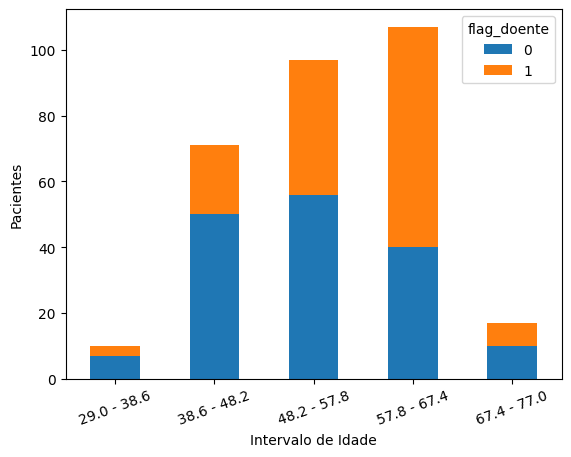

In [73]:
# Remove as colunas 'All', 'odds', 'odds_ratio', 'logito', 'WOE'
#tab_age = tab_age.drop(columns=['All', 'odds', 'odds_ratio', 'logito', 'WOE'])

# Cria o gráfico de barras empilhadas
ax = tab_age.plot(kind='bar', stacked=True)

# Configura os rótulos do eixo x e y
ax.set_xlabel('Intervalo de Idade')
ax.set_ylabel('Pacientes')

# Define os novos rótulos do eixo x
xtick_labels = ['29.0 - 38.6', '38.6 - 48.2', '48.2 - 57.8', '57.8 - 67.4', '67.4 - 77.0']
ax.set_xticklabels(xtick_labels)

# Exibe o gráfico
plt.xticks(rotation=20)
plt.show()